# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on Poland Data Analyst roles.



In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\mmarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\mmarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mmarc\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an

In [2]:
# Filter DataFrame to include only Data Analyst jobs located in Poland
df_DA_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')].copy()

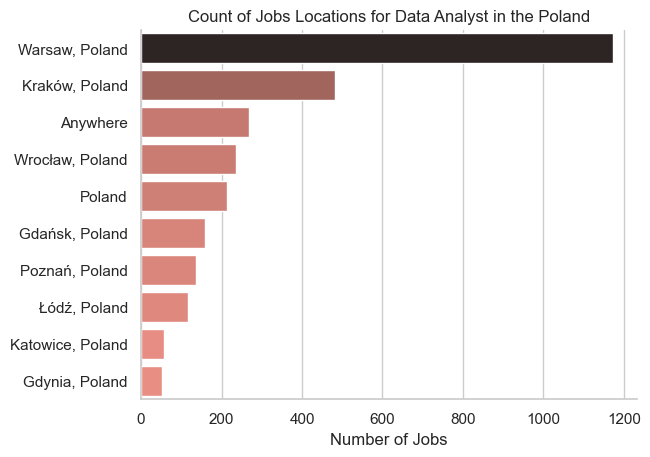

In [ ]:
# Get the top 10 most frequent job locations for Data Analyst positions in Poland as a DataFrame
df_plot = df_DA_PL['job_location'].value_counts().head(10).to_frame()

# Plot top 10 job locations for Data Analyst in Poland
sns.set_theme(style='whitegrid')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:salmon_r', legend=False)
sns.despine()
plt.title('Count of Jobs Locations for Data Analyst in the Poland')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

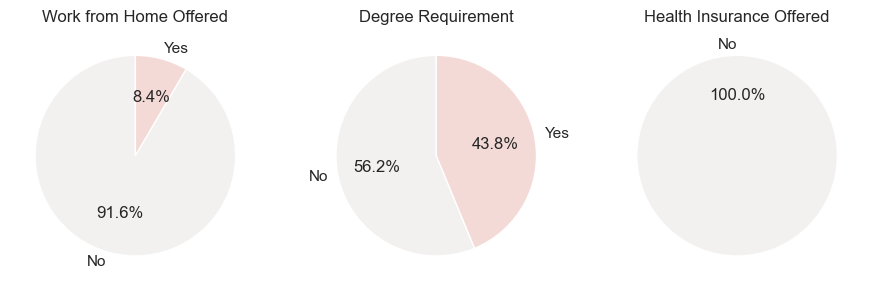

In [93]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

df_DA_PL['job_health_insurance'].value_counts()

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    labels = ['No', 'Yes']
    angle=90
    if len(df_DA_PL[column].value_counts()) == 1:
        labels=['No']
        angle=270
    ax[i].pie(df_DA_PL[column].value_counts(), labels=labels, autopct='%1.1f%%', startangle=angle, colors=sns.color_palette('light:salmon'))
    ax[i].set_title(title)

plt.show()

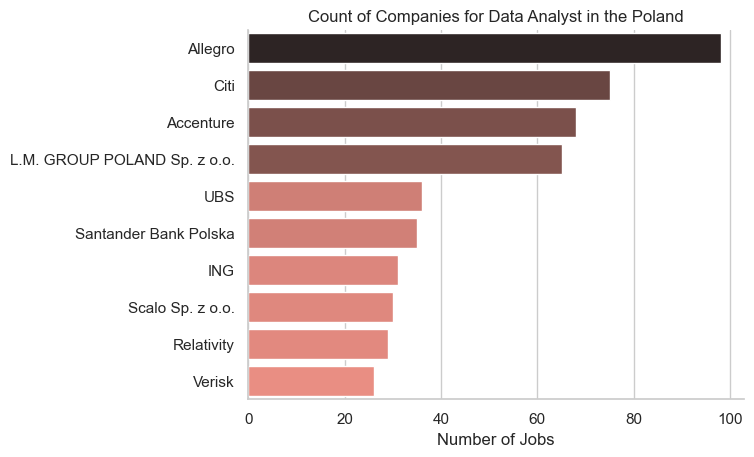

In [86]:
df_plot = df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='whitegrid')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:salmon_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in the Poland')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()